<a href="https://colab.research.google.com/github/SeptiLutfiana/PCVK_Ganjil_2023/blob/main/Week09_SeptiLutfiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kelompok 3 - TI 3H

Mohammad Izamul Fikri Fahmi - 2141720171

Lukas Valentino - 2141720032

Septi Lutfiani - 2141720038

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

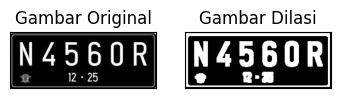

In [54]:
def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p, q), dtype=np.uint8)

  # struktutr element dilasi (SED)
  SED = np.ones((w, w), dtype=np.uint8)
  constant1 = (w - 1) // 2

  # Proses Dilasi
  for i in range(constant1, p - constant1):
    for j in range(constant1, q - constant1):
      temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
      product = temp * SED
      imgD[i, j] = np.max(product)

  return imgD

# input gambar
img_d = cv2.imread("/content/drive/MyDrive/PCVK/images/plat_nomer.jpg", 0)

# Threshold gambar
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)

# cek jika threshold gambar tidak diketahui
if thresh is not None:
  # Dilate the image
  imgD = dilasi_citra(thresh, 5)

  # menampilkan plat original dan plat yang sudah di lakukan dilasi data
  plt.subplot(131), plt.imshow(img_d, cmap="gray")
  plt.title("Gambar Original"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(imgD, cmap="gray")
  plt.title("Gambar Dilasi"), plt.xticks([]), plt.yticks([])
  plt.show()
else:
  print("The input image is empty or invalid.")


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


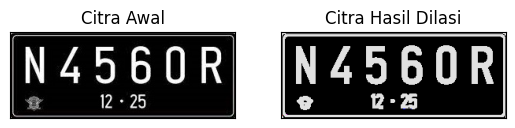

In [55]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg')
ret, thresh = cv2.threshold(img2, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img2),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

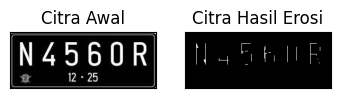

In [61]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
      for j in range(constant,n-constant):
        temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
        product= temp*SE
        imgE[i,j]= np.min(product)
  return imgE

img_e= cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
#
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

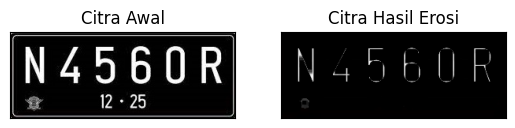

In [63]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

**Operasi Opening Menggunakan tanpa Library Morphology**

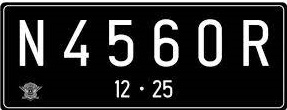

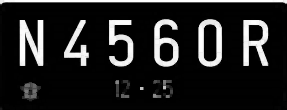

In [130]:
import cv2
import numpy as np

def opening(image, kernel):
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    return dilation

# Read the image
image = cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg', 0)

# Define a 3x3 kernel filled with ones
kernel = np.ones((3, 3), np.uint8)

# Apply the opening operation
result = opening(image, kernel)

# Show the original and result images using cv2_imshow()
from google.colab.patches import cv2_imshow
cv2_imshow(image) # gambar asli
cv2_imshow(result) # gambar setelah operation
plt.show()

**Operasi Opening Menggunakan Library Morphology**

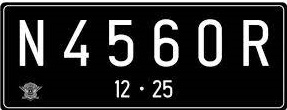

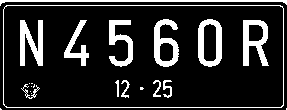

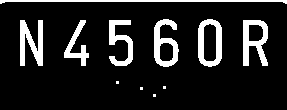

In [131]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def opening(image, kernel):
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    return dilation

# membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg', 0)

# binary gambar
_, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# kernel 3x3
kernel = np.ones((3, 3), np.uint8)
# operasi opening
result = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

cv2_imshow(img) # gambar asli
cv2_imshow(binary_image) # gambar binary
cv2_imshow(result) # gambar setelah operation

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

**operasi closing tanpa library morphology**

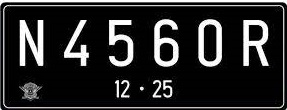

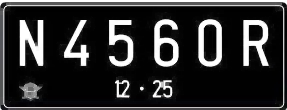

In [138]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read the input image
image = cv2.imread("/content/drive/MyDrive/PCVK/images/plat_nomer.jpg")

# Define the structuring element as a square 3x3 matrix
se = np.ones((3, 3), dtype=np.uint8)

# Perform dilation on the image using the structuring element
dilated_image = cv2.dilate(image, se)

# Perform erosion on the dilated image using the same structuring element
eroded_image = cv2.erode(dilated_image, se)

# Display the resulting image
cv2_imshow(image) # gambar asli
cv2_imshow(eroded_image) # operasi closing
plt.show()

**operasi closing dengan library morphology**

(Text(0.5, 1.0, 'Citra Hasil Opening'), ([], []), ([], []))

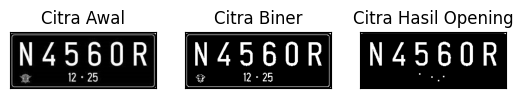

In [143]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

cros 3

SED = Cross 3


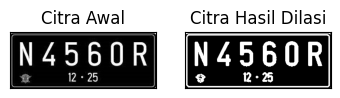

In [144]:
#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)

  SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()


**Cros 5**

SED = Cross 5


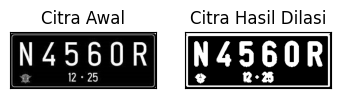

In [145]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)

  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

**Cros 3**

SED = Circle 3


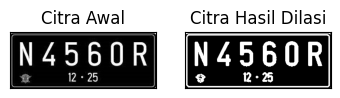

In [146]:
#Dilasi Circular SED

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Cros 5**

SED = Circle 5


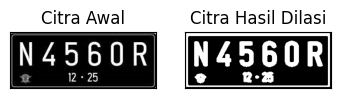

In [147]:
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/images/plat_nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

13. TopHat

14.  BLACKHAT

15. Skeleton

16. Skeleton Inverse

17. Thickening

** Tugas Praktikum**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.